In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan, ShiftFit
from HoughLine import show_hough_linetransform, show_ransac_points_line, show_plot, Correlation_plot,show_intensity_plot, Peak_Data
from bokeh.models import Label
from bokeh.plotting import figure, show, output_notebook
from IPython.display import clear_output
from bokeh.models import Range1d
import csv
from GaussFit import MakePath

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed

In [2]:
targetdir = '/Users/aimachine/Documents/Oz-linescan/TestLineScan/'

Membraneimage = '/Users/aimachine/Documents/Oz-linescan/TestLineScan/Membrane.tif'

Actinimage = '/Users/aimachine/Documents/Oz-linescan/TestLineScan/Actin.tif'



#Enter time unit in seconds
Time_unit = 1
#Enter pixel to micrometer conversion
Xcalibration = 0.1032
#Enter the number of pixels to be included in the fit
Fitaround= 8

#Symmetric psf as input (micrometers)
psf = 0.17

showaftertime = 100
inisigmaguess =  psf
#Size of linescan
skip = 50
singleblock = 40 

#Number of segments
numsegments = 10
id = []
for i in range(0, numsegments):
    id.append(i)
    
MakePath(targetdir)    
save_dir = targetdir + 'ls_data'    
MakePath(save_dir)


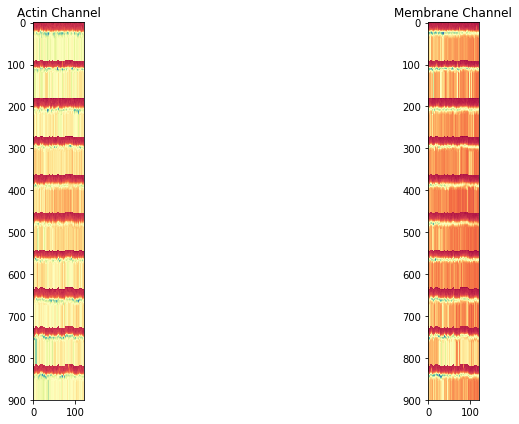

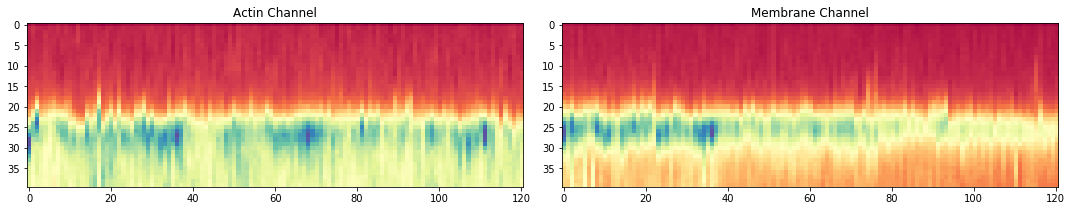

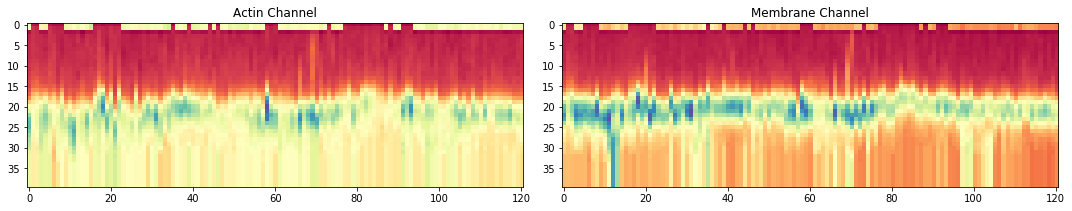

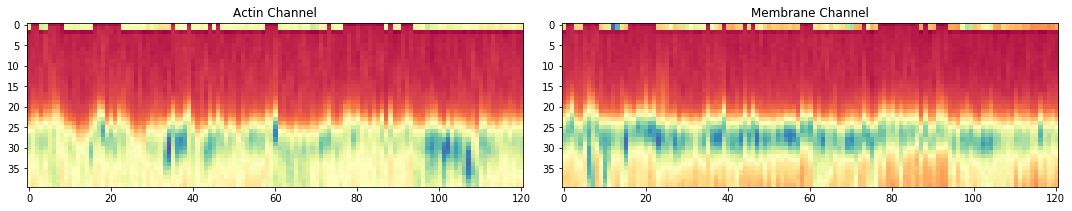

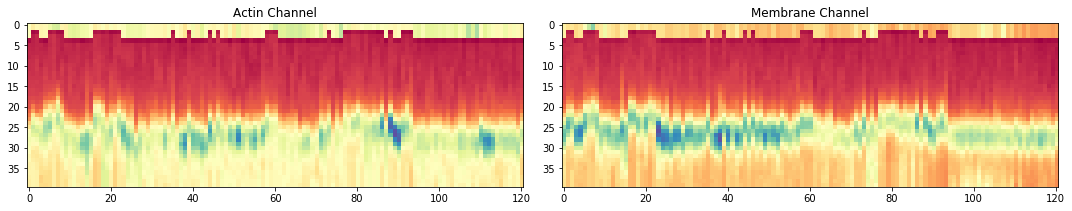

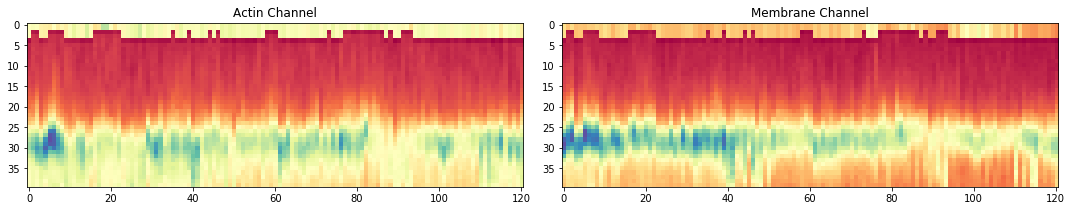

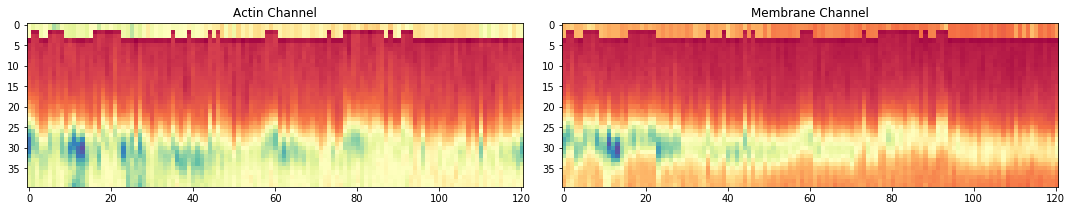

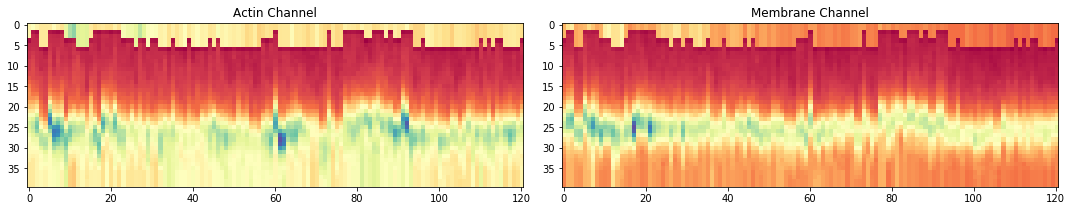

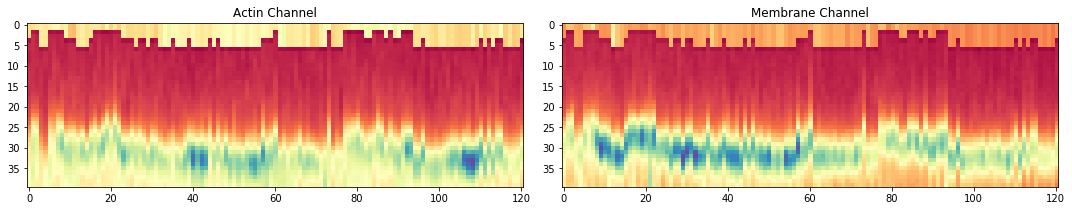

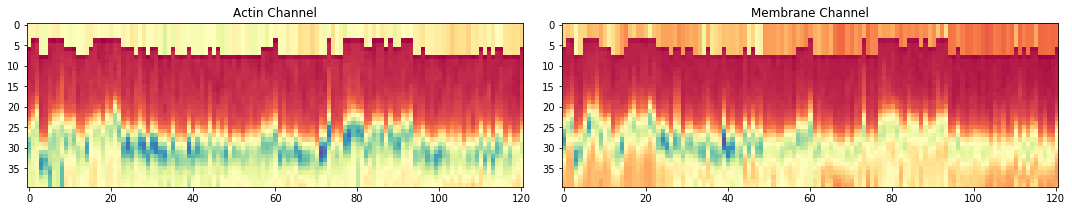

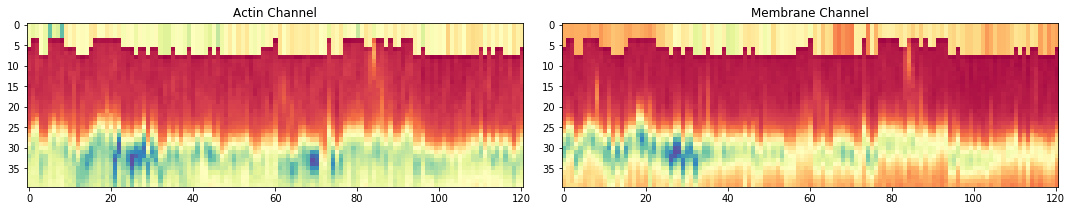

In [3]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)

doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')
blockimageActin = []
blockimageMembrane = []

i = 0
while i < Actin.shape[0]:
       
   blockActin = Actin[i:i + singleblock,:]#/np.amax(Actin[i:i + singleblock,:], 0)
   blockMembrane = Membrane[i:i + singleblock,:]#/np.amax(Membrane[i:i + singleblock,:],0)
   
   blockimageActin.append(blockActin)
   blockimageMembrane.append(blockMembrane)
   doubleplot(blockActin, blockMembrane, 'Actin Channel', 'Membrane Channel')
   i = i + singleblock + skip 

halflength = int(len(blockimageActin)/2)
otherhalf = len(blockimageActin) - halflength
totallength = len(blockimageActin)


block id 1


/Users/aimachine/PyImage/utils/GaussFit.py:454: RuntimeWarning: invalid value encountered in true_divide
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])
/Users/aimachine/PyImage/utils/GaussFit.py:470: RuntimeWarning: invalid value encountered in true_divide
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])


2.808718467615119 2.6491875200811377


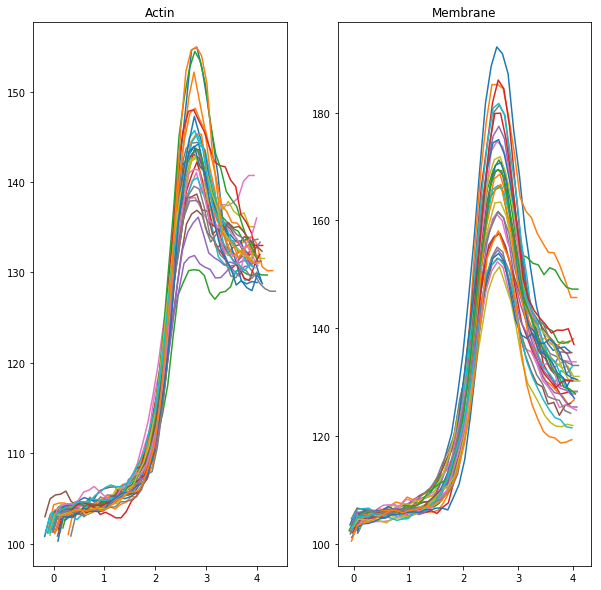

/Users/aimachine/PyImage/utils/GaussFit.py:470: RuntimeWarning: invalid value encountered in double_scalars
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])


Membrane Fit: (Amp, Sigma, PeakPos, C) [ 23.21623214   0.2905515    2.64713977 135.28288907]
Actin Fit: [ 3.25894558e+05  1.09402604e+01  2.83041836e+00 -1.17420031e+04]


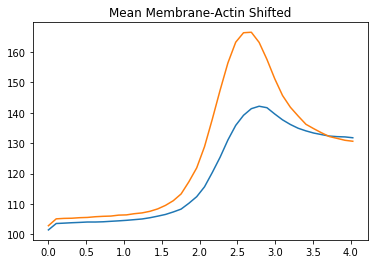

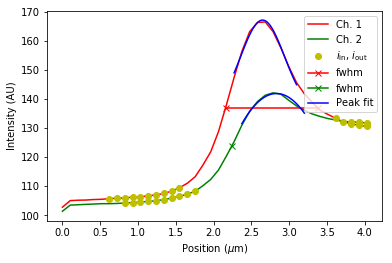

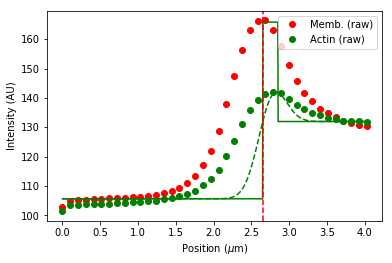

Thickness (nm), center cortex , cortical actin intensity (from fit) 201.65197925273378 2.747965758060663 165.83160340667746


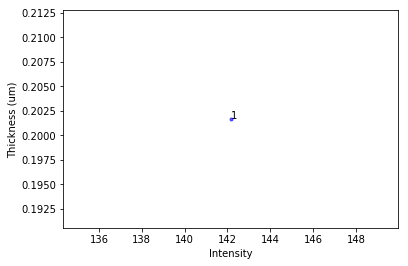

Thickness (min) 201.65197925273378 nm
Thickness (median) 201.65197925273378 nm
Thickness (max) 201.65197925273378 nm
block id 2


/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


2.3520131201008057 2.2028962840522905


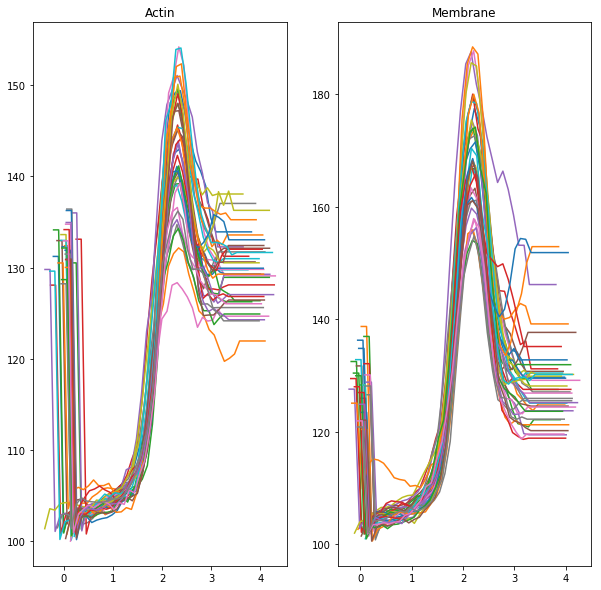

/Users/aimachine/PyImage/utils/GaussFit.py:454: RuntimeWarning: invalid value encountered in double_scalars
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])


Membrane Fit: (Amp, Sigma, PeakPos, C) [108.56355765   0.47610599   2.21067264  74.78305161]
Actin Fit: [ 1.01924661e+06  1.42883049e+01  2.35275170e+00 -2.83178915e+04]


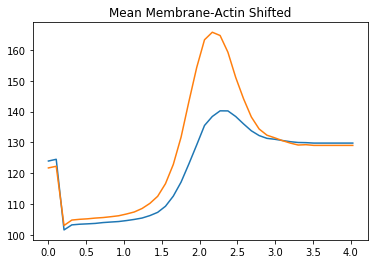

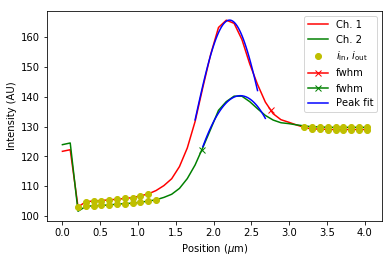

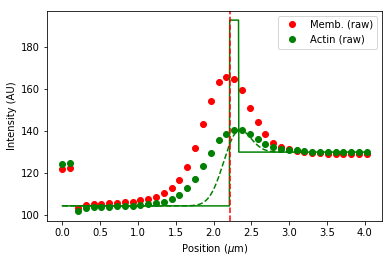

Thickness (nm), center cortex , cortical actin intensity (from fit) 121.52161123139474 2.2714334489473345 192.7430118016334


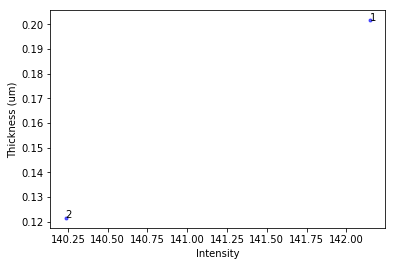

Thickness (min) 121.52161123139474 nm
Thickness (median) 161.58679524206426 nm
Thickness (max) 201.65197925273378 nm
block id 3
3.0161057816049706 2.8557643055247577


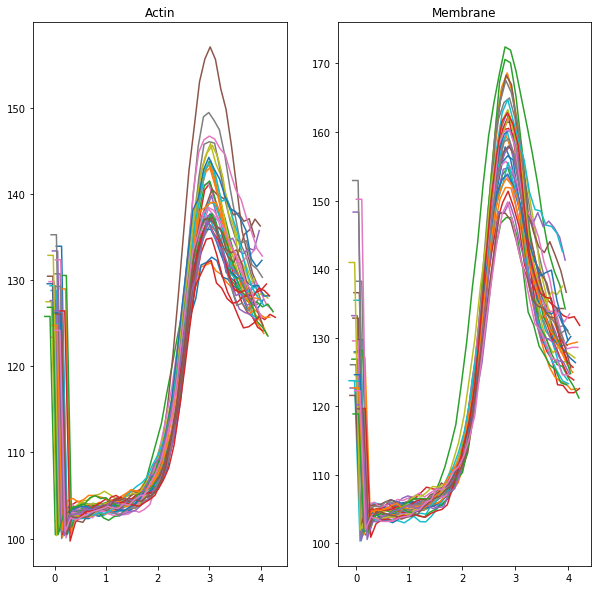

Membrane Fit: (Amp, Sigma, PeakPos, C) [138.7409582    0.62083707   2.86271836  68.53261499]
Actin Fit: [67.46870333  0.58023628  3.02512815 92.8089441 ]


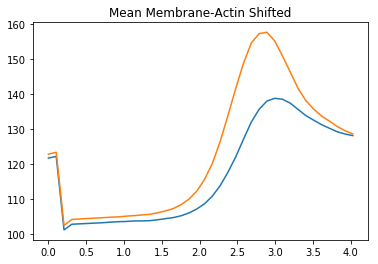

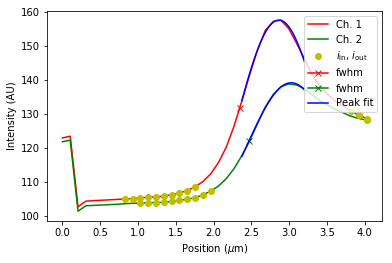

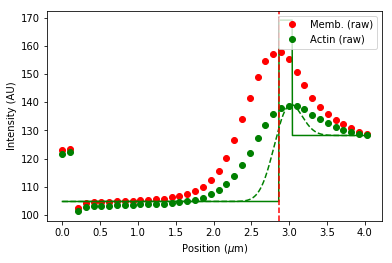

Thickness (nm), center cortex , cortical actin intensity (from fit) 177.43936896187483 2.951438045783825 169.17119261063925


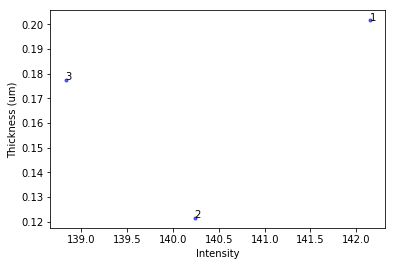

Thickness (min) 121.52161123139474 nm
Thickness (median) 177.43936896187483 nm
Thickness (max) 201.65197925273378 nm
block id 4


In [ ]:
%%time
#Fit all blocks

Thickness = []
Intensity = []
PeakActin = []
DataActin = []
PeakMembrane = []
DataMembrane = []
Time = []
ID = []
for i in range(0, totallength):
    
 BlockActin = []
 BlockMembrane = []
    
 print('block id', i+1) 
 currentid = i+1
 ID.append(i + 1)
 Actin = blockimageActin[i]
 Membrane = blockimageMembrane[i]
 
 StripFit(Membrane, Actin, Time_unit, Xcalibration, Fitaround, psf, inisigmaguess, showaftertime, Thickness, Intensity, PeakActin, BlockActin, PeakMembrane, BlockMembrane, Time)
 Correlation_plot(Thickness, Intensity, ID)
 
 print("Thickness (min)",np.min(Thickness) *1000, "nm")
 print("Thickness (median)",np.median(Thickness) *1000, "nm")
 print("Thickness (max)",np.max(Thickness) *1000, "nm")
 
 Thickness_intensity = np.column_stack([Thickness, Intensity]) 
 
 Thickness_id = np.column_stack([Thickness, ID]) 
 

 #clear_output(wait = True)
    


In [ ]:

hist, edges = np.histogram((Thickness), density=False, bins='auto')
p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%np.abs(edges[np.argmax(hist)] * 1000)) + 'nm', y_axis_label='Counts',x_axis_label='Thickness(um)')
listedges = edges.tolist()
listhist = hist.tolist()
output_notebook()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
for  i in range(0,len(listhist)):
  if listhist[i] > 0:
   mytext = Label(x=listedges[i], y=listhist[i], text=str('%.4f'%listedges[i]))
   p.add_layout(mytext)
show(p)    


In [ ]:

master_data= []

Path(save_dir).mkdir(exist_ok = True)

for line in Thickness_id:
    master_data.append(line)
writer = csv.writer(open(save_dir + "/" + (os.path.basename(Actinimage))  +".csv", "w"))
writer.writerows(master_data)  

In [ ]:

num_clusters = 2
show_intensity_plot(Thickness_intensity, ymin = 0, ymax = 0.3, num_clusters = num_clusters )
    
    

In [ ]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots() 
ax.plot(Thickness_intensity[:, 0], Thickness_intensity[: , 1], '.b', alpha=0.6,
        label='Inlier data')
x_min, x_max = ax.get_xlim()
ax.axis([x_min,1.5, 120, 190])
ax.set_xlabel('Thickness (um)')
ax.set_ylabel('Intensity')
X = np.column_stack([Thickness_intensity[:, 0], Thickness_intensity[: , 1]])  
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
for i in range(0, len(centers)):
     print('X:', centers[i, 0], 'Y: ', centers[i, 1])
plt.show()